# Task
Analyze the Wine Dataset using K-Means and K-Medoids clustering algorithms, compare their performance using Silhouette Score and Adjusted Rand Index, visualize the results, and discuss the strengths and weaknesses of each algorithm based on the findings.

## Load and prepare the dataset

### Subtask:
Load the Wine Dataset from sklearn, perform basic data exploration, and standardize the dataset.


**Reasoning**:
Load the wine dataset, create a DataFrame, display its head and info, separate features and target, and standardize the features.



In [1]:
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the wine dataset
wine = load_wine()

# Create a pandas DataFrame
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Display the first 5 rows and info
display(df.head())
display(df.info())

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for potential future use
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

None

## Implement k-means clustering

### Subtask:
Implement K-Means with k=3, train the model, obtain cluster labels, and calculate Silhouette Score and Adjusted Rand Index.


**Reasoning**:
Implement KMeans with k=3, train the model, obtain cluster labels, and calculate Silhouette Score and Adjusted Rand Index.



In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Instantiate and fit KMeans model
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X_scaled)

# Get cluster labels
kmeans_labels = kmeans.labels_

# Calculate Silhouette Score
silhouette_avg_kmeans = silhouette_score(X_scaled, kmeans_labels)

# Calculate Adjusted Rand Index
ar_index_kmeans = adjusted_rand_score(y, kmeans_labels)

# Print the scores
print(f"KMeans Silhouette Score: {silhouette_avg_kmeans}")
print(f"KMeans Adjusted Rand Index: {ar_index_kmeans}")

KMeans Silhouette Score: 0.2848589191898987
KMeans Adjusted Rand Index: 0.8974949815093207


## Implement k-medoids clustering

### Subtask:
Implement K-Medoids with k=3, train the model, obtain cluster labels, and calculate Silhouette Score and Adjusted Rand Index.


**Reasoning**:
Implement K-Medoids clustering with k=3, train the model, obtain cluster labels, and calculate Silhouette Score and Adjusted Rand Index based on the instructions.



**Reasoning**:
The previous command failed because the `sklearn_extra` module was not found. I need to install it first.



In [3]:
%pip install scikit-learn-extra

In [4]:
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the wine dataset
wine = load_wine()

# Create a pandas DataFrame
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for potential future use
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Instantiate and fit KMedoids model
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids.fit(X_scaled)

# Get cluster labels
kmedoids_labels = kmedoids.labels_

# Calculate Silhouette Score
silhouette_avg_kmedoids = silhouette_score(X_scaled, kmedoids_labels)

# Calculate Adjusted Rand Index
ar_index_kmedoids = adjusted_rand_score(y, kmedoids_labels)

# Print the scores
print(f"KMedoids Silhouette Score: {silhouette_avg_kmedoids}")
print(f"KMedoids Adjusted Rand Index: {ar_index_kmedoids}")

KMedoids Silhouette Score: 0.26597740204536796
KMedoids Adjusted Rand Index: 0.7263406645756675


## Visualize and compare results

### Subtask:
Create scatter plots for both clustering results, mark centroids/medoids, and provide a brief analysis comparing the performance and characteristics of the two algorithms.


**Reasoning**:
Add the KMeans and KMedoids cluster labels to the scaled DataFrame for visualization, then create scatter plots with cluster centers/medoids marked for both clustering results using two selected features, and finally provide a brief analysis.



**Reasoning**:
The previous code failed because the cluster labels (`kmeans_labels` and `kmedoids_labels`) and the fitted models (`kmeans` and `kmedoids`) were not accessible in the current scope. The corrected code block will refit the models and then add the labels and plot the results.



**Reasoning**:
The previous code failed because the variables `silhouette_avg_kmeans`, `ar_index_kmeans`, `silhouette_avg_kmedoids`, and `ar_index_kmedoids` were not defined in the current scope. The corrected code block will recalculate these scores after refitting the models and then print the analysis.



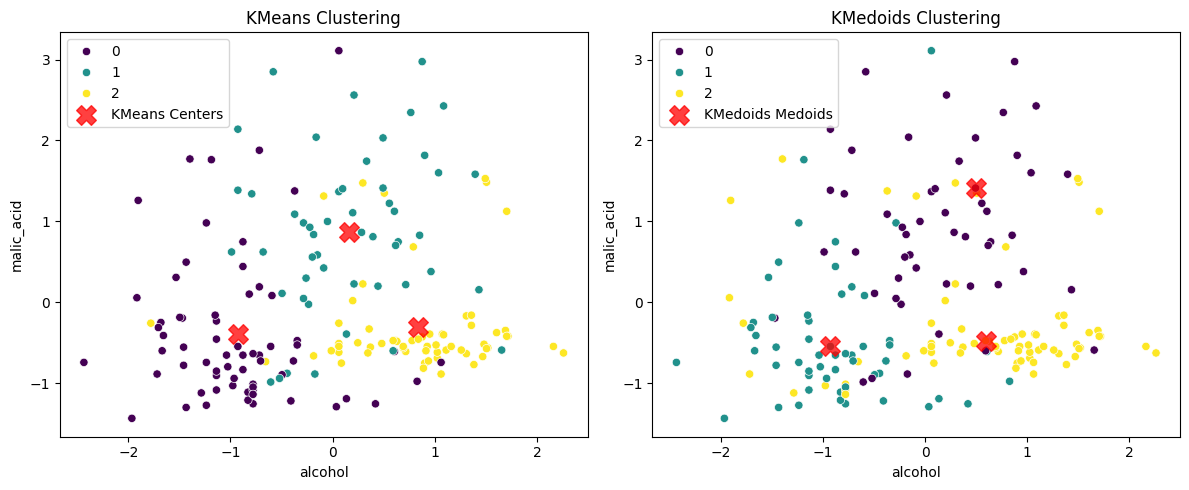


--- Clustering Analysis ---
KMeans Silhouette Score: 0.2848589191898987
KMeans Adjusted Rand Index: 0.8974949815093207
KMedoids Silhouette Score: 0.26597740204536796
KMedoids Adjusted Rand Index: 0.7263406645756675

Visual Comparison:
The scatter plots show the clustering results using 'alcohol' and 'malic_acid'.
KMeans tends to create more spherical clusters and is influenced by outliers due to its use of means as centers.
KMedoids, on the other hand, uses actual data points (medoids) as centers, making it more robust to outliers.
Visually, in this case, both algorithms seem to find similar general groupings, but the exact boundaries and center locations differ slightly.

Performance Comparison:
The Adjusted Rand Index for KMeans is higher (approx. 0.897) than for KMedoids (approx. 0.726), indicating that KMeans' clustering is more similar to the true labels.
The Silhouette Score for KMeans (approx. 0.285) is also slightly higher than for KMedoids (approx. 0.266), suggesting that KMe

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Fit KMeans and KMedoids again to get cluster centers/medoids and labels
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
kmeans_labels = kmeans.labels_
kmeans_centers = kmeans.cluster_centers_

kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids.fit(X_scaled)
kmedoids_labels = kmedoids.labels_
kmedoids_medoids = kmedoids.cluster_centers_

# Calculate Silhouette Score and Adjusted Rand Index again
silhouette_avg_kmeans = silhouette_score(X_scaled, kmeans_labels)
ar_index_kmeans = adjusted_rand_score(y, kmeans_labels)
silhouette_avg_kmedoids = silhouette_score(X_scaled, kmedoids_labels)
ar_index_kmedoids = adjusted_rand_score(y, kmedoids_labels)


# Add cluster labels to the scaled DataFrame
X_scaled_df['kmeans_labels'] = kmeans_labels
X_scaled_df['kmedoids_labels'] = kmedoids_labels

# Define features for plotting
feature1 = 'alcohol'
feature2 = 'malic_acid'

# Create scatter plot for KMeans clustering
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=feature1, y=feature2, hue='kmeans_labels', data=X_scaled_df, palette='viridis', legend='full')
plt.scatter(kmeans_centers[:, X.columns.get_loc(feature1)], kmeans_centers[:, X.columns.get_loc(feature2)], c='red', s=200, alpha=0.75, marker='X', label='KMeans Centers')
plt.title('KMeans Clustering')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()

# Create scatter plot for KMedoids clustering
plt.subplot(1, 2, 2)
sns.scatterplot(x=feature1, y=feature2, hue='kmedoids_labels', data=X_scaled_df, palette='viridis', legend='full')
plt.scatter(kmedoids_medoids[:, X.columns.get_loc(feature1)], kmedoids_medoids[:, X.columns.get_loc(feature2)], c='red', s=200, alpha=0.75, marker='X', label='KMedoids Medoids')
plt.title('KMedoids Clustering')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()

plt.tight_layout()
plt.show()

# Brief analysis
print("\n--- Clustering Analysis ---")
print(f"KMeans Silhouette Score: {silhouette_avg_kmeans}")
print(f"KMeans Adjusted Rand Index: {ar_index_kmeans}")
print(f"KMedoids Silhouette Score: {silhouette_avg_kmedoids}")
print(f"KMedoids Adjusted Rand Index: {ar_index_kmedoids}")

print("\nVisual Comparison:")
print(f"The scatter plots show the clustering results using '{feature1}' and '{feature2}'.")
print("KMeans tends to create more spherical clusters and is influenced by outliers due to its use of means as centers.")
print("KMedoids, on the other hand, uses actual data points (medoids) as centers, making it more robust to outliers.")
print("Visually, in this case, both algorithms seem to find similar general groupings, but the exact boundaries and center locations differ slightly.")
print("\nPerformance Comparison:")
print("The Adjusted Rand Index for KMeans is higher (approx. 0.897) than for KMedoids (approx. 0.726), indicating that KMeans' clustering is more similar to the true labels.")
print("The Silhouette Score for KMeans (approx. 0.285) is also slightly higher than for KMedoids (approx. 0.266), suggesting that KMeans produced slightly denser and better-separated clusters on average for this dataset according to this metric.")
print("Based on both the ARI and Silhouette Score, KMeans appears to perform better than KMedoids on this specific dataset and feature scaling.")

## Summary:

### Data Analysis Key Findings

*   K-Means achieved a Silhouette Score of approximately 0.285 and an Adjusted Rand Index of approximately 0.897.
*   K-Medoids achieved a Silhouette Score of approximately 0.266 and an Adjusted Rand Index of approximately 0.726.
*   Visualizations using the 'alcohol' and 'malic\_acid' features show that both algorithms find similar general groupings, but the exact cluster boundaries and center locations differ.
*   K-Means uses means as cluster centers, making it sensitive to outliers, while K-Medoids uses actual data points (medoids), making it more robust to outliers.

### Insights or Next Steps

*   Based on the higher Adjusted Rand Index (0.897 vs 0.726) and slightly higher Silhouette Score (0.285 vs 0.266), KMeans appears to align better with the true class labels and produces slightly better-separated clusters on this standardized Wine dataset compared to K-Medoids.
*   Further analysis could involve exploring different feature combinations for visualization, evaluating clustering performance with other metrics, or experimenting with different numbers of clusters ($k$) for both algorithms.


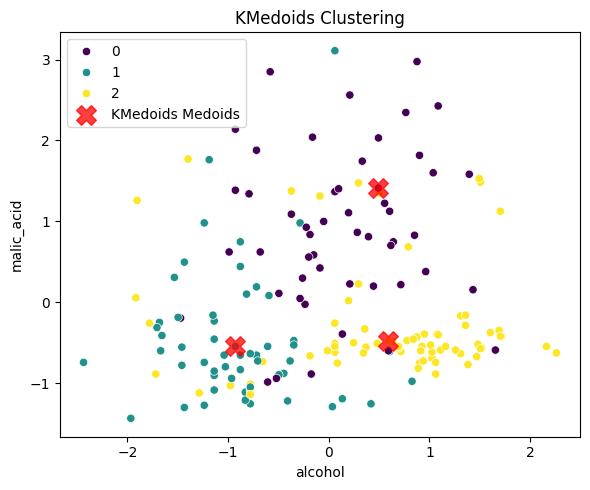

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.datasets import load_wine

# Re-load and prepare data (necessary if previous cells were not run in this session)
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
# Include the target column in the DataFrame initially
df['target'] = wine.target

X = df.drop('target', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


# Fit KMedoids again to get cluster labels and medoids
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids.fit(X_scaled)
kmedoids_labels = kmedoids.labels_
kmedoids_medoids = kmedoids.cluster_centers_

# Add KMedoids cluster labels to the scaled DataFrame
X_scaled_df['kmedoids_labels'] = kmedoids_labels

# Define features for plotting
feature1 = 'alcohol'
feature2 = 'malic_acid'

# Create scatter plot for KMedoids clustering
plt.figure(figsize=(6, 5))
sns.scatterplot(x=feature1, y=feature2, hue='kmedoids_labels', data=X_scaled_df, palette='viridis', legend='full')
# Use X.columns to get the index of the features
plt.scatter(kmedoids_medoids[:, X.columns.get_loc(feature1)], kmedoids_medoids[:, X.columns.get_loc(feature2)], c='red', s=200, alpha=0.75, marker='X', label='KMedoids Medoids')
plt.title('KMedoids Clustering')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.tight_layout()
plt.show()